In [4]:
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('./test_images/maria3.jpeg')
img.shape

(555, 700, 3)

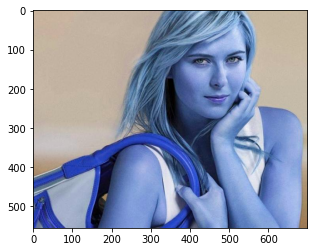

In [6]:
plt.imshow(img)

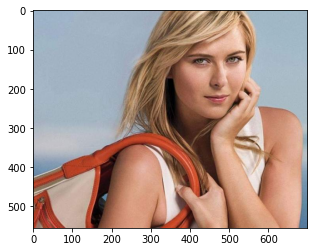

In [7]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

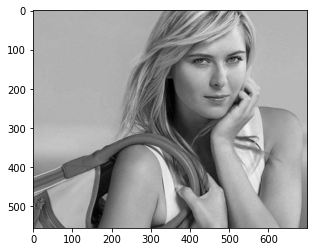

In [8]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_img, cmap='gray')

## Looking for a face and putting square around

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(grey_img,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

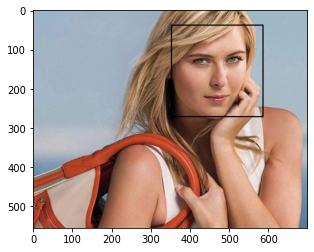

In [10]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(rgb_img,(x,y),(x+w,y+h),(0,0,0),2)
plt.imshow(face_img)

352 38 233 233


[[133  64  49  49]
 [ 51  66  51  51]
 [101 144  26  26]]


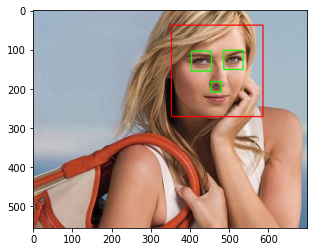

In [11]:
#cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    print(x,y,w,h)
    face_img = cv2.rectangle(rgb_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey = grey_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_color)
    print("\n")
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

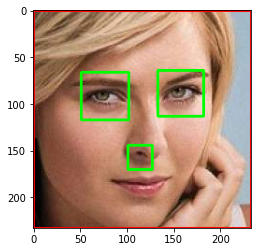

In [12]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

## Function to look for a face and crop it out

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

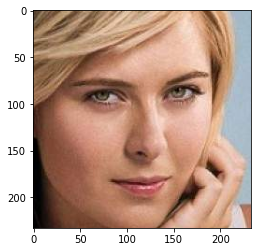

In [14]:
cropped_image = get_cropped_image_if_2_eyes("./test_images/maria3.jpeg")
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_image)

In [15]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [16]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/lionel_messi',
 './dataset/virat_kohli',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/yuliya_levchenko',
 './dataset/cropped']

### check if folder exists, remove it then create it anew

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

## Look for faces and crop and store in specific folder

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder+ "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

# Saving list of directories to a file

In [19]:
import json

In [20]:
cropped_image_dirs

NameError: name 'cropped_image_dirs' is not defined

#Save python list to file
with open('cropped_image_dirs.txt', 'w') as cr:
    cr.write(json.dumps(cropped_image_dirs))

In [ ]:
# Now read the file back into a Python list object
with open('cropped_image_dirs.txt', 'r') as cr:
    cropped_image_dirs = json.loads(cr.read())

In [ ]:
cropped_image_dirs

# Saving dictionary of file names to a file

In [ ]:
celebrity_file_names_dict

#Saving dictionary to file
celebrity_file_names_dict_file = open("celebrity_file_names_dict.json", "w")
json.dump(celebrity_file_names_dict, celebrity_file_names_dict_file)
celebrity_file_names_dict_file.close()

In [ ]:
#Retrieving dictionary of filenames from json file
celebrity_file_names_dict_file = open("celebrity_file_names_dict.json", "r")
celebrity_file_names_dict = json.load(celebrity_file_names_dict_file)

In [ ]:
celebrity_file_names_dict    

## Wavelet Transform

In [ ]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    # Datatype conversion
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    
    # Compute coefficients
    coeffs = pywt.wavedec2(imArray,mode,level=level)
    
    # Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H  

In [ ]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')